<a href="https://colab.research.google.com/github/TheKnight909/T5/blob/main/penguins_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on Penguins

In this notebook exercise, we will conduct simple EDA steps on the popular penguins dataset.

### Load the dataset

Dataset source: https://github.com/allisonhorst/palmerpenguins

In [129]:
import seaborn as sns

In [130]:
df = sns.load_dataset('penguins')

In [131]:
df.shape

(344, 7)

# Step 1 Understand the Features

You can find information about this dataset here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

**Question: in your own words**:
1. describe each feature
2. mention its type (numeric or categorical)
3. write its name in Arabic

Note: use a Markdown cell.

* species: It represents the penguin species (Chinstrap, Adélie, or Gentoo) / categorical / صنف البطريق

* culmen_length_mm: It is the length of the the upper ridge of a bird's beak in (mm) / numeric / طول الجزء العلوي لمنقار الطائر

* culmen_depth_mm: It is the depth of the the upper ridge of a bird's beak in (mm) / numeric / عمق الجزء العلوي لمنقار الطائر

* flipper_length_mm: It is the length of the Penguins wings in (mm) / numeric / طول زعانف البطريق

* body_mass_g: It is the body mass of the Penguins in (g) / numeric / وزن البطريق

* island: It is the island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) / categorical / اسم الجزيرة

* sex: it is the penguin sex / categorical / الجنس

Hint: you can attach an image to illustrate what the features are.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

# Step 2

- Have a look at the columns and their values (`head`, `sample`, `tail`)
- Look at the technical information (`info`)

In [132]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [133]:
df.info() # Technical information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [134]:
df.describe() # statistical information for numeric value

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [135]:
df.describe(include='object') # statistical information for categorical value

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,152,168,168


# Step 3

1. For each column, check and handle missing values; state your strategy and justify it. Examples:
    - Strategy: drop the column. Justification: ...?
    - Strategy: fill missing values. Justificaiton: ...?
    - Strategy: drop the row. Justification: ...?
1. Calculate count and percentage of missing values before handling them
1. Check and handle duplicated rows
1. Calculate the percentage of data loss after cleaning

In [136]:
print(df.isna().sum(),"\n") # To count how many null value in each column
df[df.isnull().any(axis=1)] # To show only the Rows with null value

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64 



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [137]:
for col in df.columns:
    x= df[col].isnull().sum() / len(df) * 100
    print(col+":",df[col].isnull().sum(),"|", round(x, 2),"%")

species: 0 | 0.0 %
island: 0 | 0.0 %
bill_length_mm: 2 | 0.58 %
bill_depth_mm: 2 | 0.58 %
flipper_length_mm: 2 | 0.58 %
body_mass_g: 2 | 0.58 %
sex: 11 | 3.2 %


In [138]:
# count the numbers of columns and rows before cleaning
num_rows_before=df.shape[0]
num_column_before=df.shape[1]

In [139]:
df.drop([3,339],inplace=True) # For column 3 and 339 I will drop it because the major value on it is empty

In [140]:
df[df.isnull().any(axis=1)] # To show only the Rows with null value

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [141]:
# For the column Sex: since only 11 value out of 344 is empty i will fill it with the mode
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

# Another way using Sciket learn:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='most_frequent')
# df.iloc[:,:] = imputer.fit_transform(df)


In [142]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [143]:
df.duplicated().sum()

0

In [144]:
# count the numbers of columns and rows after cleaning
num_rows_after=df.shape[0]
num_column_after=df.shape[1]
print("Data loss for Rows:",round((num_rows_before - num_rows_after)/ num_rows_before ,3),"%")
print("Data loss for columns:",round((num_column_before - num_column_after)/ num_column_before * 100,3),"%")

Data loss for Rows: 0.006 %
Data loss for columns: 0.0 %


# Step 4

#### Data types conversion
- We shall convert the string types to `category` to preserve memory
- numeric types can be stored in less precision: `float32`

In [145]:
mem_usage_before = df.memory_usage(deep=True)

In [146]:
# convert categotical types
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

In [147]:
# convert numerical types
df['bill_length_mm'] = df['bill_length_mm'].astype('float32')
df['bill_depth_mm'] = df['bill_depth_mm'].astype('float32')
df['flipper_length_mm'] = df['flipper_length_mm'].astype('float32')
df['body_mass_g'] = df['body_mass_g'].astype('float32')

Calculate memory saved after type conversion

In [148]:
# mem_usage_after = ...?
mem_usage_after = df.memory_usage(deep=True)

In [149]:
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')

memory saved: 66 KB


# Step 5

#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

- hint: use `.unique()` to check the number of unique values in a column
- you can also use: `.value_counts()` to check the frequency of each value in a column

In [150]:
for col in df.select_dtypes(include=['category']):
  print(f"Column {col}: {df[col].unique()}")
  print(df[col].value_counts())
  print("\n")
# everything is good

Column species: ['Adelie', 'Chinstrap', 'Gentoo']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']
species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64


Column island: ['Torgersen', 'Biscoe', 'Dream']
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']
island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64


Column sex: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
sex
Male      177
Female    165
Name: count, dtype: int64




In [151]:
# from sklearn.preprocessing import LabelEncoder
# lb = LabelEncoder()
# df["sex_Encoded"] = lb.fit_transform(df["sex"])
# df[['sex',"sex_Encoded"]]

# Step 6: Univariate Analysis

- Separate numerical from categorical columns (hint; use `df.select_dtypes()`)
- Look at the statistical information for each:
    - `df_num.describe().T`
    - `df_cat.describe().T`

In [152]:
# Separate numerical and categorical columns
df_num = df.select_dtypes(include=['number'])
df_cat = df.select_dtypes(include=['category'])

# Look at the statistical information
print("Numerical Columns:")
df_num.describe().T

Numerical Columns:


,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921932,5.459584,32.099998,39.225,44.450001,48.500000,59.599998
bill_depth_mm,342.0,17.151171,1.974793,13.100000,15.600,17.299999,18.700001,21.500000
flipper_length_mm,342.0,200.915207,14.061714,172.000000,190.000,197.000000,213.000000,231.000000
body_mass_g,342.0,4201.754395,801.954529,2700.000000,3550.000,4050.000000,4750.000000,6300.000000


In [153]:
print("\nCategorical Columns:")
df_cat.describe().T


Categorical Columns:


,count,unique,top,freq
species,342,3,Adelie,151
island,342,3,Biscoe,167
sex,342,2,Male,177


Use charts to plot `value_counts()` categorical variables:
1. plot `species` using bar plot
1. plot `island` using pie chart
1. plot `sex` using horizontal bar plot

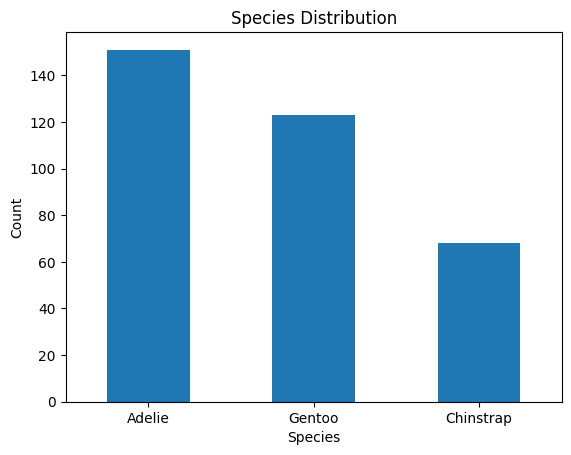

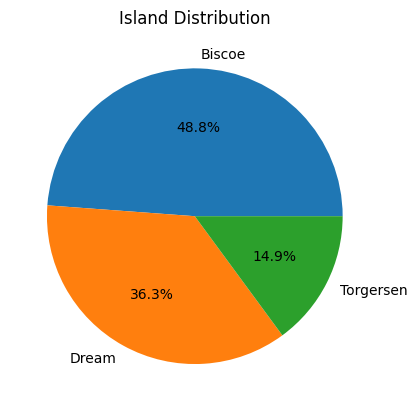

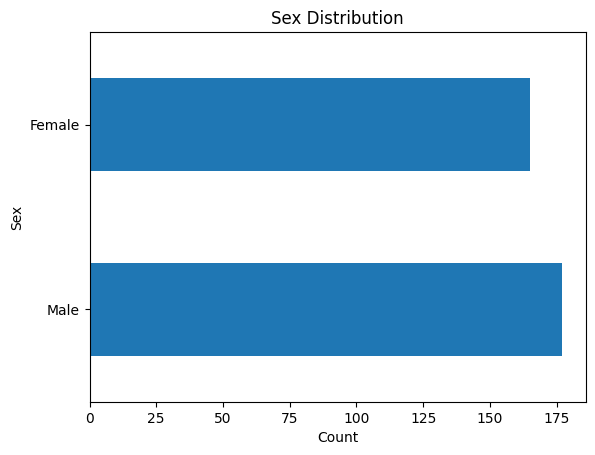

In [154]:
import matplotlib.pyplot as plt

# Plot species using bar plot
df['species'].value_counts().plot(kind='bar')
plt.title('Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
print("\n")

# Plot island using pie chart
df['island'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Island Distribution')
plt.ylabel('')
plt.show()
print("\n")

# Plot sex using horizontal bar plot
df['sex'].value_counts().plot(kind='barh')
plt.title('Sex Distribution')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.show()


Plot numerical variables:

1. Boxplot: `bill_length_mm`
1. Histogram: `bill_depth_mm`
1. Boxplot: `flipper_length_mm`
1. Histogram: `body_mass_g`

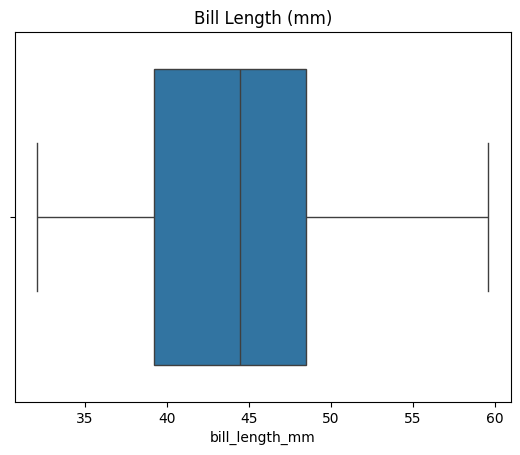

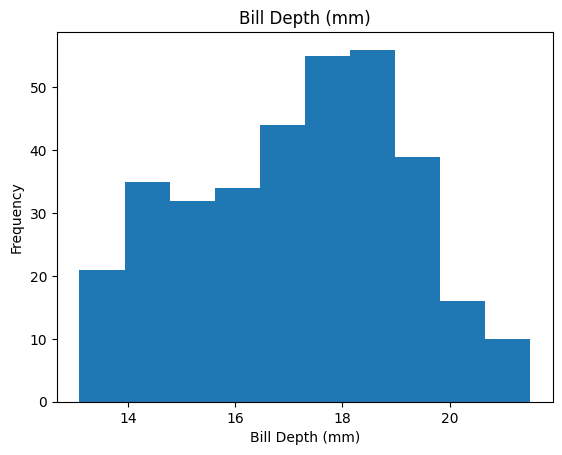

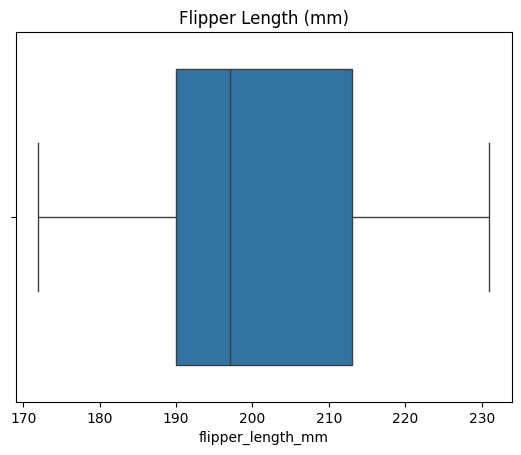

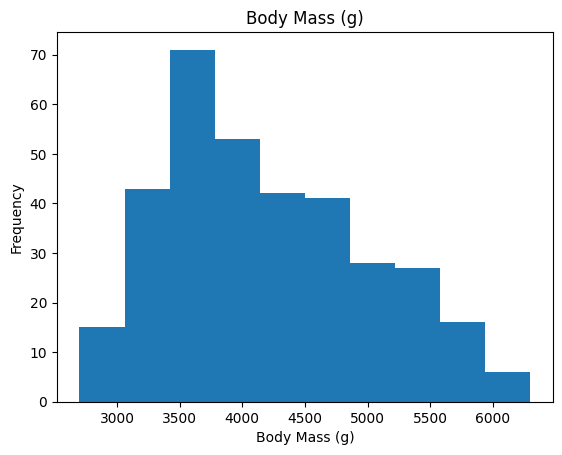

In [155]:
import matplotlib.pyplot as plt
# Boxplot: bill_length_mm
plt.figure()
sns.boxplot(x=df['bill_length_mm'])
plt.title('Bill Length (mm)')
plt.show()
print("\n")

# Histogram: bill_depth_mm
plt.figure()
plt.hist(df['bill_depth_mm'])
plt.title('Bill Depth (mm)')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')
plt.show()
print("\n")

# Boxplot: flipper_length_mm
plt.figure()
sns.boxplot(x=df['flipper_length_mm'])
plt.title('Flipper Length (mm)')
plt.show()
print("\n")

# Histogram: body_mass_g
plt.figure()
plt.hist(df['body_mass_g'])
plt.title('Body Mass (g)')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()


## Step 7: Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

- Hint: you can use the `df.corr()` to find the correlation matrix.
- Hint: you can use `sns.heatmap()` to plot the correlation matrix

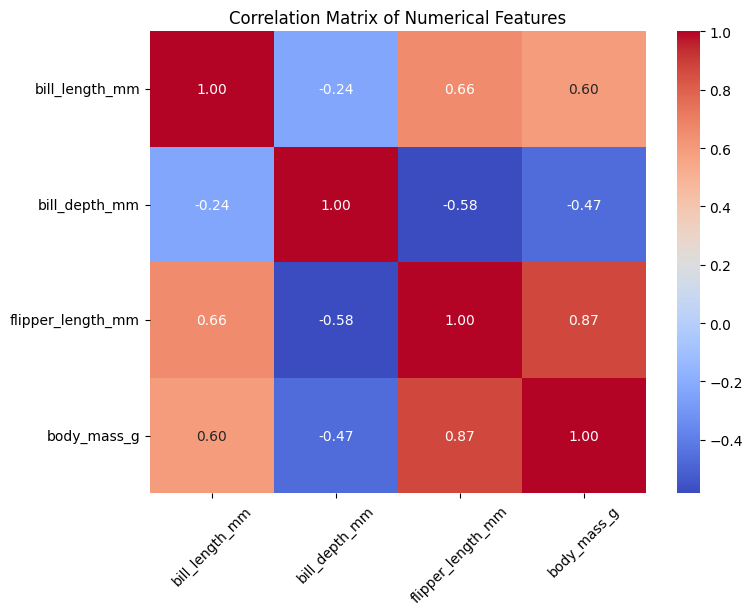

In [156]:
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = df_num.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45)
plt.show()



Write down your observations based on the correlation heatmap.

Observations:
* I can see that there is a high correlation between the weight and the flipper length of the penguin.
* And there is also a correlation between the bill length and the flipper length of the penguin.
* In addation there is a correlation between the bill length and the weight of the penguin.

### Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [157]:
# Calculate bill_size (product of bill_length and bill_depth)
df['bill_size'] = df['bill_length_mm'] * df['bill_depth_mm']

# Calculate bill_ratio (ratio of bill_length to bill_depth)
df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm']

df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_size,bill_ratio
0,Adelie,Torgersen,39.099998,18.700001,181.0,3750.0,Male,731.169983,2.090909
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.0,Female,687.299988,2.270115
2,Adelie,Torgersen,40.299999,18.000000,195.0,3250.0,Female,725.399963,2.238889
4,Adelie,Torgersen,36.700001,19.299999,193.0,3450.0,Female,708.309998,1.901554
5,Adelie,Torgersen,39.299999,20.600000,190.0,3650.0,Male,809.580017,1.907767


Let's look at the correlation to see whether the newly created features are better.

<Axes: >

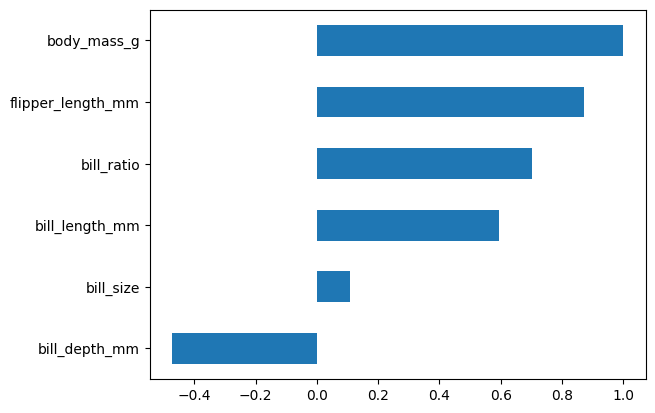

In [158]:
# This plots the correlation values for a specific column
# which is usually what we are interested in
df_num = df.select_dtypes(include=['number'])
df_cat = df.select_dtypes(include=['category'])
corr = df_num.corr()
corr['body_mass_g'].sort_values().plot.barh()
